# Stock Movement using K-Means Clustering


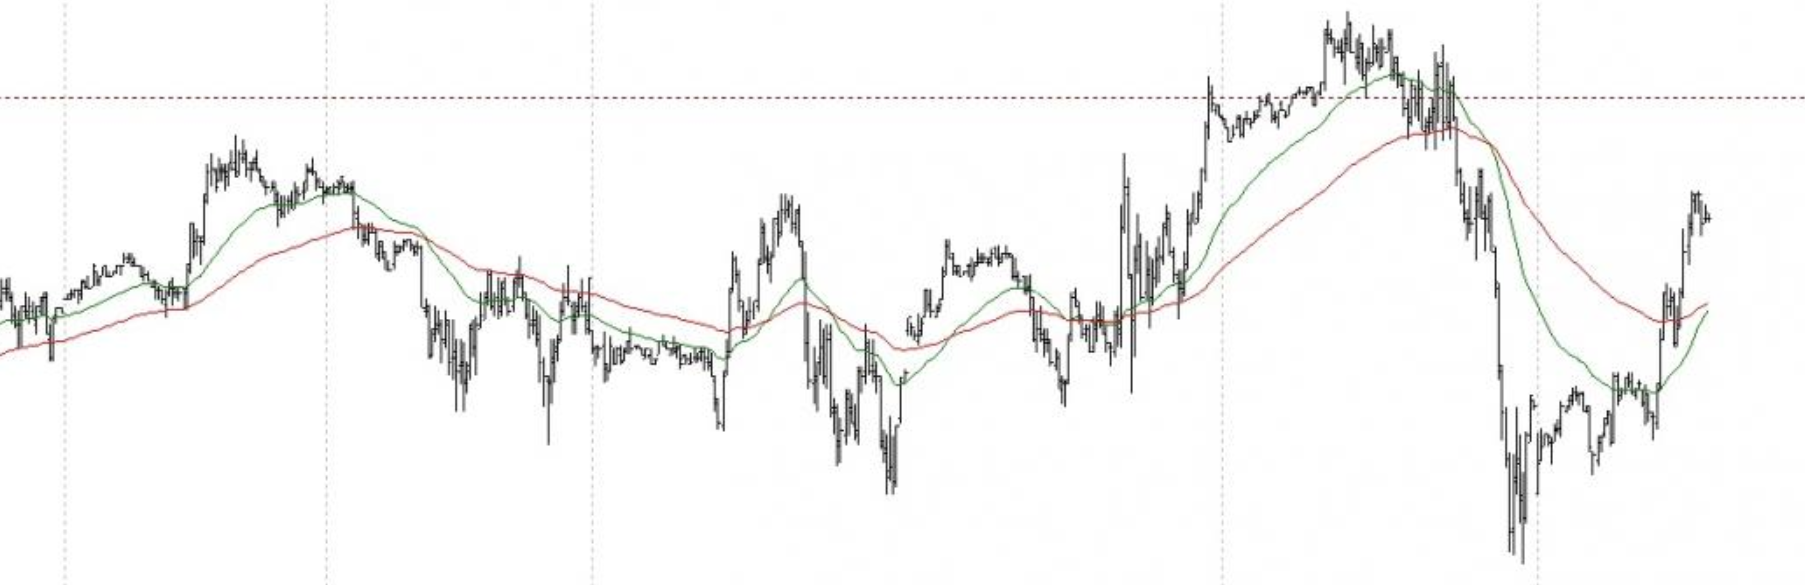

The given dataset contains the closing stock prices for S&P500 stocks for a period of time. Their symbols show on the column headers. The companies operate in 10 sectors as follows (from SP500Companies.xls):

Health Care

Financials

Information Technology

Industrials

Utilities

Materials

Consumer Staples

Consumer Discretionary

Energy

Telecommunications Services

In the preprocessing step, a new data set is created to indicate if the stock prices increase compared with the previous day (1 or 0 corresponding to UP or DOWN). The matrix is then transposed such that the up/down movement of a stock is in in a row. The model will cluster rows/points in a number of clusters. Here the number of clusters is chosen to be 10 to see if the stocks (or most of) of companies operating in the same sectors happen to be grouped together.

The km function implements the K-means algorithm. The outer loop loops for a number of max iterations. The first inner loop assigns each example/point to a cluster. The 2nd loop re-computes the centroids of the clusters.


Write a function km that implements the k-means algorithm. The input arguments are the data set X, number of K clusters, and the maximum number of iterations. The function returns an n-by-1 matrix (n is the number of instances), each element in the matrix stores the cluster number of the associated instance. 

In [1]:
############################################
# K-means based Clustering for Stock Prices#
############################################

import numpy as np
import csv
import random
import os
import pandas as pd
def km(X, K, max_iters):
    # Write code to return the cluster numbers 
    row, col = X.shape # raw: 484 col:364 
    idx = np.zeros((row, 1))
    pre_idx = np.zeros((row, 1))
    centroids = np.random.rand(K, col)
    test = np.zeros((K, 1))
    for i in range(max_iters):
        diff = False
        for j in range(row):
            X_test = np.tile(X[j], (K, 1))
            test = np.sum((X_test - centroids)**2, axis = 1)
            pre_idx[j] = idx[j]
            idx[j] = int(np.argmin(test))
            if (idx[j] != pre_idx[j]) and (not diff):
                diff = True
        for k in range(K):
            index = np.squeeze(idx == k)
            centroids[k] = np.mean(np.squeeze(X[np.where(index), :]), axis = 0)
        if diff == False:
                break    
    
    
    
    return idx

with open(r"C:\Users\User\Desktop\2019 Spring\Big Data\Week5\sp500_short_period.csv") as csvfile:
    csvData = csv.reader(csvfile)
    datList = []
    for row in csvData:
        datList.append(row)

symbols = np.array(datList.pop(0))

data = np.array(datList)
data = data.astype(np.float)
c = np.double((data[1:np.size(data, 0), :] - data[0:np.size(data, 0) - 1, :]) > 0)
movement = np.transpose(c)

K = 10                          # 10 sectors so that 10 classes
max_iters = 1000                # maximum iterations
random.seed(1234)
idx = km(movement, K, max_iters)

for k in range(K):
    print('\nStocks in group %d moving up together\n' % (k+1))
    k = np.array(k)
    index = np.squeeze(idx == k)
    print(symbols[np.where(index)])


Stocks in group 1 moving up together

['AMT' 'AIV' 'AVB' 'BXP' 'EQR' 'HCP' 'HCN' 'KIM' 'PCL' 'PLD' 'PSA' 'SPG'
 'VTR' 'VNO']

Stocks in group 2 moving up together

['AES' 'GAS' 'AEE' 'AEP' 'CNP' 'CMS' 'ED' 'D' 'DTE' 'DUK' 'EIX' 'ETR'
 'EXC' 'FE' 'TEG' 'NEE' 'NI' 'NU' 'NRG' 'OKE' 'POM' 'PCG' 'PNW' 'PPL'
 'PEG' 'SCG' 'SRE' 'SO' 'SE' 'TE' 'WEC' 'XEL']

Stocks in group 3 moving up together

['AET' 'ABC' 'CAH' 'CI' 'DTV' 'ESRX' 'HUM' 'LH' 'NTAP' 'DGX' 'SWY' 'TWC'
 'UNH' 'WLP']

Stocks in group 4 moving up together

['ANF' 'ACN' 'AMD' 'A' 'AKAM' 'ALTR' 'AIG' 'ADI' 'APOL' 'AMAT' 'BAC' 'BMC'
 'BWA' 'BRCM' 'CA' 'CVC' 'KMX' 'CAT' 'CBG' 'CF' 'CSCO' 'C' 'CME' 'CMA'
 'CSC' 'GLW' 'DE' 'DOW' 'ETFC' 'EMN' 'EA' 'EXPD' 'FFIV' 'FDX' 'FITB' 'FHN'
 'FSLR' 'FLIR' 'FLR' 'F' 'GE' 'GNW' 'GS' 'GT' 'HOG' 'HRS' 'HIG' 'HAS'
 'HPQ' 'HST' 'HBAN' 'INTC' 'IGT' 'JBL' 'JDSU' 'JCI' 'JOY' 'JPM' 'JNPR'
 'KEY' 'KLAC' 'LRCX' 'LM' 'LUK' 'LLTC' 'LYB' 'MPC' 'MET' 'MCHP' 'MU'
 'MSFT' 'MS' 'MOS' 'NDAQ' 'NVDA' 'OI' 'PH' 'JCP' 'PS

# Foodmart Association Rule Analysis 

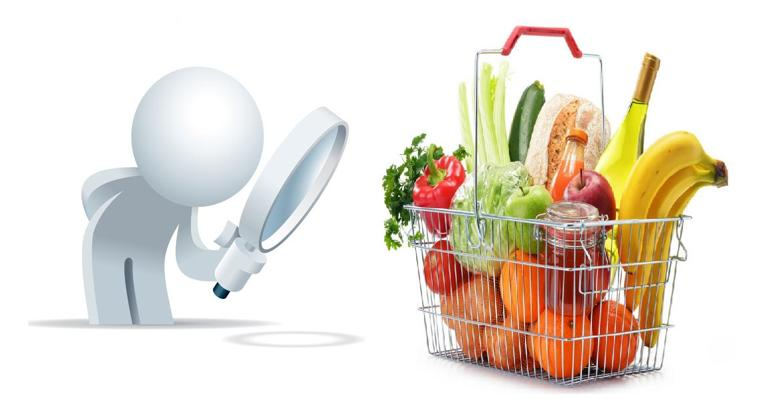

An association rule has two parts, an antecedent (if) and a consequent (then). In this question you program Association Rule Analysis to find rules X  Y, where X and Y are itemsets.  Association Rule Mining algorithm in general takes 2 steps:

1. Frequent Itemset Generation: Generate all itemsets of which support ≥ minsup (here minsup is the minimum support).

2. Rule Generation: Generate high confidence rules from each frequent itemset, where each rule is a binary partitioning of a frequent itemset.

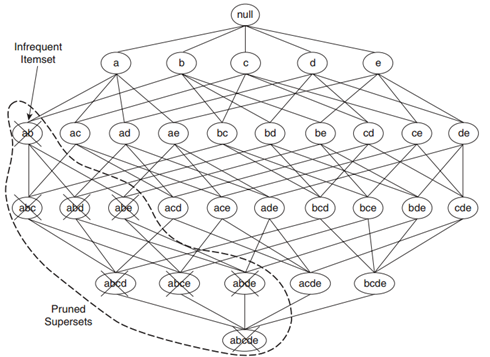

Fig. 1: Illustration of support-based pruning: if {a,b} is infrequent, all the supersets are infrequent (Introduction to Data Mining (Pang-Ning Tan et al.)

Support (s) is defined as the fraction of transactions that contain both X and Y, and confidence (c) is the measures how often items in Y appear in transactions that contain X:

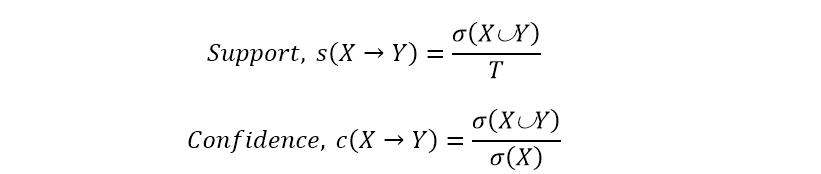

Apriori principle is used to reduce the number of candidate itemsets without counting support values. If an itemset is frequent, then all of its subsets must also be frequent, and if an itemset is found infrequent, all the supersets are infrequent as well. In Fig. 1, as {a,b} is found infrequent, all the supersets are infrequent as well.

The Apriori algorithm pseudo-code is as follows (See Fig. 2 for illustration). It uses support-based pruning to remove itemsets that have low support. 

============================Apriori==============================

Find the frequent itemsets of size 1(L1)

k=1

While (Lk not empty) { 

    a.	Generate candidate itemsets of size k+1 (Ck+1) based on Lk.

    b.	Prune the list based on the apriori principle (eliminate candidates which have an infrequent subset)

    c.	Scan the transactions to count support for the remaining candidates and eliminate the infrequent ones

    d.	Lk+1  = Ck+1

    e.	Increase k by 1

}

==================================================================

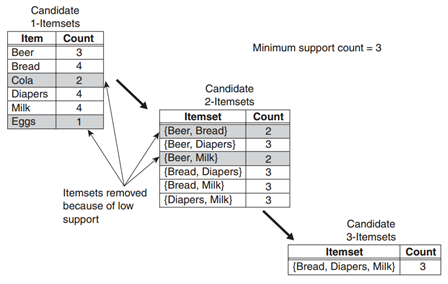

Fig. 2: Illustration of frequent itemset generation using Apriori algorithm (Introduction to Data Mining (Pang-Ning Tan et al.)

A rule can be extracted by partitioning a frequent itemset Y in two non-empty subsets: X and Y - X such that X -> Y - X satisfies the confidence threshold. 

To efficiently generate rules from frequent itemsets, notice that confidence of rules generated from the same itemset, for example with L = {A,B,C,D}:

c(BCD -> A) ≥ c(BC -> AD) ≥ c(B -> ACD)

If BCD -> A is found low confident, then all others above are low in confidence as well.

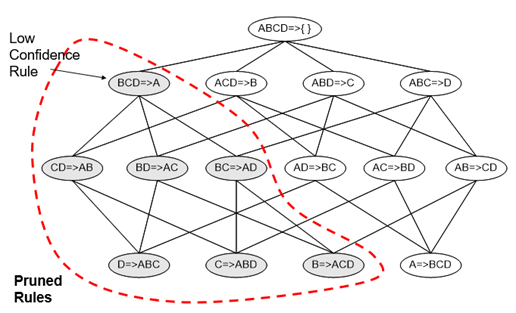

Fig. 3: Rule Generation for Apriori Algorithm (Pang-Ning Tan et al.)

In [1]:
# The code and examples were provided by third-party at
# http://aimotion.blogspot.com/2013/01/machine-learning-and-data-mining.html

#def load_dataset():
#    "Load the sample dataset."
#    return [[1, 3, 4], [2, 3, 5], [1, 2, 3, 5], [2, 5]]
import csv
import pandas as pd

def load_dataset():
    
    with open(r"C:\Users\User\Desktop\2019 Spring\Big Data\Week5\basket.dat") as file:
        datList2 = list(csv.reader(file))
    with open(r"C:\Users\User\Desktop\2019 Spring\Big Data\Week5\product.xlsx", 'rb') as ex:
        product = pd.read_excel(ex)

    return datList2, product

def createC1(dataset):
    "Create a list of candidate item sets of size one."
    c1 = []
    for transaction in dataset:
        for item in transaction:
            if not [item] in c1:
                c1.append([item])
    c1.sort()
    #frozenset because it will be a ket of a dictionary.
    return map(frozenset, c1)


def scanD(dataset, candidates, min_support):
    "Returns all candidates that meets a minimum support level"
    sscnt = {}
    for tid in dataset:
        for can in candidates:
            if can.issubset(tid):
                sscnt.setdefault(can, 0)
                sscnt[can] += 1

    num_items = float(len(dataset))
    retlist = []
    support_data = {}
    for key in sscnt:
        support = sscnt[key] / num_items
        if support >= min_support:
            retlist.insert(0, key)
        support_data[key] = support
    return retlist, support_data


def aprioriGen(freq_sets, k):
    "Generate the joint transactions from candidate sets"
    retList = []
    lenLk = len(freq_sets)
    for i in range(lenLk):
        for j in range(i + 1, lenLk):
            L1 = list(freq_sets[i])[:k - 2]
            L2 = list(freq_sets[j])[:k - 2]
            L1.sort()
            L2.sort()
            if L1 == L2:
                retList.append(freq_sets[i] | freq_sets[j])
    return retList


def apriori(dataset, minsupport=0.005):
    "Generate a list of candidate item sets"
    C1 = createC1(dataset)
    D = map(set, dataset)
    L1, support_data = scanD(D, C1, minsupport)
    L = [L1]
    k = 2
    while (len(L[k - 2]) > 0):
        Ck = aprioriGen(L[k - 2], k)
        Lk, supK = scanD(D, Ck, minsupport)
        support_data.update(supK)
        L.append(Lk)
        k += 1

    return L, support_data

def generateRules(L, support_data, min_confidence=0.7):
    """Create the association rules
    L: list of frequent item sets
    support_data: support data for those itemsets
    min_confidence: minimum confidence threshold
    """
    rules = []
    for i in range(1, len(L)):
        for freqSet in L[i]:
            H1 = [frozenset([item]) for item in freqSet]
#            print "freqSet", freqSet, 'H1', H1
            if (i > 1):
                rules_from_conseq(freqSet, H1, support_data, rules, min_confidence)
            else:
                calc_confidence(freqSet, H1, support_data, rules, min_confidence)
    return rules


def calc_confidence(freqSet, H, support_data, rules, min_confidence=0.7):
    "Evaluate the rule generated"
    pruned_H = []
    for conseq in H:
        conf = support_data[freqSet] / support_data[freqSet - conseq]
        if conf >= min_confidence:
#            print freqSet - conseq, '--->', conseq, 'conf:', conf
            rules.append((freqSet - conseq, conseq, conf))
            pruned_H.append(conseq)
    return pruned_H


def rules_from_conseq(freqSet, H, support_data, rules, min_confidence=0.7):
    "Generate a set of candidate rules"
    m = len(H[0])
    if (len(freqSet) > (m + 1)):
        Hmp1 = aprioriGen(H, m + 1)
        Hmp1 = calc_confidence(freqSet, Hmp1,  support_data, rules, min_confidence)
        if len(Hmp1) > 1:
            rules_from_conseq(freqSet, Hmp1, support_data, rules, min_confidence)
            
            
# Write your code here            

# Stock Movement Association Rule Analysis

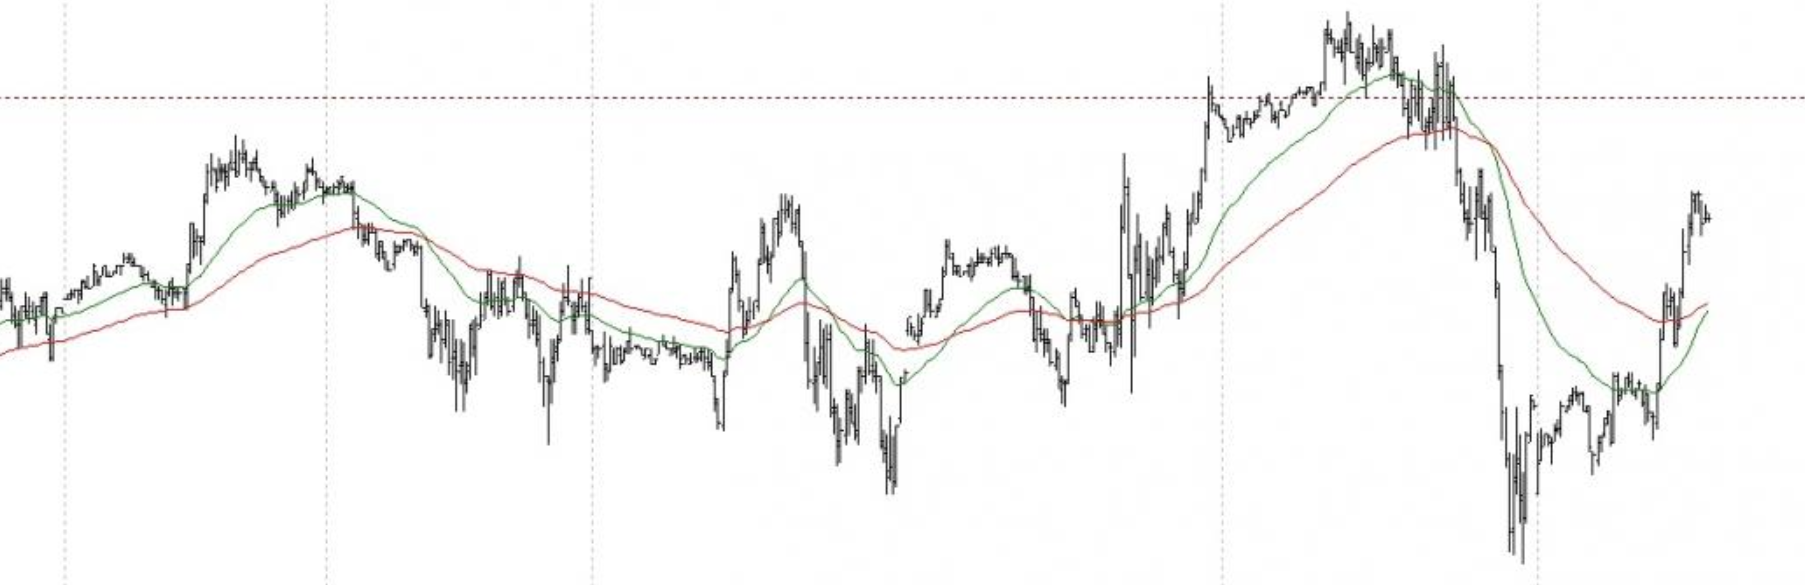

In [123]:
dataset, product = load_dataset()
dataset2 = dataset[0:100]
L, support_data = apriori(dataset2, minsupport=0.02)
r = generateRules(L, support_data, min_confidence=0.5)

for i in range(len(r)):
    x = r[i][0]
    y = r[i][1]
    x1 = ''
    x2 = ''
    for q in x:
        x1 += q
    for z in y:
        x2 += z 
    print(x1[0:len(x1)],'==>',x2[0:len(x2)])

(' 1497', '==>', ' 415')
(' 415', '==>', ' 1497')
(' 273', '==>', ' 106')
(' 106', '==>', ' 273')
(' 586', '==>', '869')
('869', '==>', ' 586')
(' 609', '==>', '869')
('869', '==>', ' 609')
(' 586', '==>', ' 609')
(' 609', '==>', ' 586')
(' 586', '==>', '869 609')
(' 609', '==>', '869 586')
('869', '==>', ' 609 586')


In [124]:
prod = list(product["product_name"])

for i in range(len(r)):
    x = r[i][0]
    y = r[i][1]
    x1 = ''
    x2 = ''
    for q in x:
        x1 += prod[int(q)]
    for z in y:
        x2 += prod[int(z)] 
    print(x1[0:len(x1)], '==>',x2[0:len(x2)])

(u'Fort West Raisins', '==>', u'Big Time Frozen Cauliflower')
(u'Big Time Frozen Cauliflower', '==>', u'Fort West Raisins')
(u'Great Pumpernickel Bread', '==>', u'Golden Frozen Corn')
(u'Golden Frozen Corn', '==>', u'Great Pumpernickel Bread')
(u'Colony Rye Bread', '==>', u'Nationeel Dried Dates')
(u'Nationeel Dried Dates', '==>', u'Colony Rye Bread')
(u'Landslide Low Fat Apple Butter', '==>', u'Nationeel Dried Dates')
(u'Nationeel Dried Dates', '==>', u'Landslide Low Fat Apple Butter')
(u'Colony Rye Bread', '==>', u'Landslide Low Fat Apple Butter')
(u'Landslide Low Fat Apple Butter', '==>', u'Colony Rye Bread')
(u'Colony Rye Bread', '==>', u'Nationeel Dried DatesLandslide Low Fat Apple Butter')
(u'Landslide Low Fat Apple Butter', '==>', u'Nationeel Dried DatesColony Rye Bread')
(u'Nationeel Dried Dates', '==>', u'Landslide Low Fat Apple ButterColony Rye Bread')


In [125]:
# Write your code here
import numpy as np

with open(r"C:\Users\User\Desktop\2019 Spring\Big Data\Week5\sp500_short_period.csv") as file2:
    csvfile2 = csv.reader(file2)
    stockList = []
    for row in csvfile2:
        stockList.append(row)
        
sym = dict(enumerate(np.array(stockList.pop(0))))
data = np.array(datList).astype(np.float)
current = data[1:np.shape(data)[0], :]
previous = data[0:np.shape(data)[0] - 1, :]
stock_move = np.double((current - previous) > 0)
symb = {0: '_DOWN',1: '_UP'}
df = pd.DataFrame.from_records(stock_move)
for i in df:
    df[i] = [symb[s] for s in df[i]]
    df[i] = sym[i] +" "+ df[i].astype(str)
df

,0,1,2,3,4,5,6,7,8,9,...,474,475,476,477,478,479,480,481,482,483
0,MMM _DOWN,ABT _DOWN,ANF _UP,ACN _DOWN,ACE _DOWN,ACT _UP,ADBE _UP,AMD _DOWN,AES _UP,AET _DOWN,...,WYNN _DOWN,XEL _DOWN,XRX _UP,XLNX _DOWN,XL _UP,XYL _UP,YHOO _DOWN,YUM _UP,ZMH _DOWN,ZION _UP
1,MMM _UP,ABT _UP,ANF _DOWN,ACN _UP,ACE _DOWN,ACT _UP,ADBE _DOWN,AMD _DOWN,AES _UP,AET _UP,...,WYNN _UP,XEL _UP,XRX _UP,XLNX _DOWN,XL _DOWN,XYL _DOWN,YHOO _DOWN,YUM _UP,ZMH _UP,ZION _DOWN
2,MMM _UP,ABT _DOWN,ANF _UP,ACN _DOWN,ACE _DOWN,ACT _UP,ADBE _DOWN,AMD _DOWN,AES _UP,AET _DOWN,...,WYNN _DOWN,XEL _DOWN,XRX _UP,XLNX _DOWN,XL _DOWN,XYL _UP,YHOO _DOWN,YUM _UP,ZMH _UP,ZION _DOWN
3,MMM _DOWN,ABT _UP,ANF _DOWN,ACN _DOWN,ACE _DOWN,ACT _UP,ADBE _DOWN,AMD _DOWN,AES _DOWN,AET _DOWN,...,WYNN _DOWN,XEL _UP,XRX _DOWN,XLNX _DOWN,XL _UP,XYL _DOWN,YHOO _DOWN,YUM _DOWN,ZMH _UP,ZION _UP
4,MMM _UP,ABT _UP,ANF _UP,ACN _DOWN,ACE _UP,ACT _DOWN,ADBE _UP,AMD _UP,AES _DOWN,AET _UP,...,WYNN _UP,XEL _DOWN,XRX _UP,XLNX _UP,XL _UP,XYL _UP,YHOO _UP,YUM _DOWN,ZMH _UP,ZION _UP
5,MMM _UP,ABT _DOWN,ANF _UP,ACN _UP,ACE _UP,ACT _DOWN,ADBE _UP,AMD _DOWN,AES _UP,AET _UP,...,WYNN _UP,XEL _DOWN,XRX _UP,XLNX _UP,XL _UP,XYL _UP,YHOO _UP,YUM _UP,ZMH _UP,ZION _UP
6,MMM _UP,ABT _DOWN,ANF _UP,ACN _DOWN,ACE _UP,ACT _UP,ADBE _UP,AMD _DOWN,AES _DOWN,AET _DOWN,...,WYNN _UP,XEL _DOWN,XRX _UP,XLNX _DOWN,XL _DOWN,XYL _UP,YHOO _UP,YUM _DOWN,ZMH _UP,ZION _UP
7,MMM _DOWN,ABT _DOWN,ANF _UP,ACN _DOWN,ACE _UP,ACT _DOWN,ADBE _UP,AMD _DOWN,AES _DOWN,AET _UP,...,WYNN _UP,XEL _DOWN,XRX _UP,XLNX _UP,XL _DOWN,XYL _UP,YHOO _DOWN,YUM _DOWN,ZMH _UP,ZION _DOWN
8,MMM _DOWN,ABT _DOWN,ANF _UP,ACN _UP,ACE _UP,ACT _DOWN,ADBE _DOWN,AMD _DOWN,AES _DOWN,AET _DOWN,...,WYNN _DOWN,XEL _DOWN,XRX _DOWN,XLNX _UP,XL _DOWN,XYL _DOWN,YHOO _UP,YUM _UP,ZMH _DOWN,ZION _DOWN
9,MMM _UP,ABT _UP,ANF _DOWN,ACN _UP,ACE _UP,ACT _UP,ADBE _UP,AMD _DOWN,AES _UP,AET _DOWN,...,WYNN _UP,XEL _DOWN,XRX _DOWN,XLNX _DOWN,XL _DOWN,XYL _DOWN,YHOO _DOWN,YUM _DOWN,ZMH _DOWN,ZION _DOWN


In [126]:
stock_data = df.values.tolist()
L, support_data = apriori(stock_data, minsupport=0.4)
r = generateRules(L, support_data, min_confidence = 0.7)

for i in range(len(r)):
    x = r[i][0]
    y = r[i][1]
    x1 = ''
    x2 = ''
    for q in x:
        x1 += q
    for z in y:
        x2 += z
    print(x1[0:len(x1)], '==>',x2[0:len(x2)])

('AMP _UP', '==>', 'HOG _UP')
('HOG _UP', '==>', 'AMP _UP')
('PNW _DOWN', '==>', 'TEG _DOWN')
('TEG _DOWN', '==>', 'PNW _DOWN')
('ACE _UP', '==>', 'LLL _UP')
('LLL _UP', '==>', 'ACE _UP')
('COV _UP', '==>', 'JEC _UP')
('JEC _UP', '==>', 'COV _UP')
('EMR _UP', '==>', 'SWK _UP')
('SWK _UP', '==>', 'EMR _UP')
('JCI _UP', '==>', 'NTRS _UP')
('NTRS _UP', '==>', 'JCI _UP')
('CMA _UP', '==>', 'AMP _UP')
('AMP _UP', '==>', 'CMA _UP')
('STT _UP', '==>', 'BRK.B _UP')
('BRK.B _UP', '==>', 'STT _UP')
('ROP _UP', '==>', 'ZION _UP')
('ZION _UP', '==>', 'ROP _UP')
('LNC _UP', '==>', 'AXP _UP')
('AXP _UP', '==>', 'LNC _UP')
('HD _UP', '==>', 'NTRS _UP')
('ROP _UP', '==>', 'DIS _UP')
('DIS _UP', '==>', 'ROP _UP')
('HAL _DOWN', '==>', 'SLB _DOWN')
('SLB _DOWN', '==>', 'HAL _DOWN')
('EMR _UP', '==>', 'JEC _UP')
('JEC _UP', '==>', 'EMR _UP')
('CCE _UP', '==>', 'DPS _UP')
('DPS _UP', '==>', 'CCE _UP')
('CVX _UP', '==>', 'TROW _UP')
('TROW _UP', '==>', 'CVX _UP')
('ALL _UP', '==>', 'VIAB _UP')
('PBCT _UP', 

('AVY _UP', '==>', 'FISV _UP')
('FISV _UP', '==>', 'AVY _UP')
('AIZ _UP', '==>', 'UTX _UP')
('UTX _UP', '==>', 'AIZ _UP')
('CPB _UP', '==>', 'GIS _UP')
('GIS _UP', '==>', 'CPB _UP')
('CB _UP', '==>', 'CCE _UP')
('CCE _UP', '==>', 'CB _UP')
('ARG _UP', '==>', 'NOC _UP')
('BBT _UP', '==>', 'PBCT _UP')
('PBCT _UP', '==>', 'BBT _UP')
('CINF _UP', '==>', 'HRL _UP')
('HRL _UP', '==>', 'CINF _UP')
('PKI _UP', '==>', 'AMP _UP')
('AMP _UP', '==>', 'PKI _UP')
('HAR _UP', '==>', 'ITW _UP')
('ITW _UP', '==>', 'HAR _UP')
('PH _UP', '==>', 'ITW _UP')
('ITW _UP', '==>', 'PH _UP')
('SIAL _UP', '==>', 'MMM _UP')
('MMM _UP', '==>', 'SIAL _UP')
('GNW _UP', '==>', 'WLP _UP')
('WLP _UP', '==>', 'GNW _UP')
('ICE _UP', '==>', 'CINF _UP')
('CINF _UP', '==>', 'ICE _UP')
('V _UP', '==>', 'COV _UP')
('MCK _UP', '==>', 'TROW _UP')
('TROW _UP', '==>', 'MCK _UP')
('AFL _UP', '==>', 'FISV _UP')
('FISV _UP', '==>', 'AFL _UP')
('JNJ _UP', '==>', 'AMP _UP')
('AMP _UP', '==>', 'JNJ _UP')
('STJ _UP', '==>', 'ZMH _UP')
('

('FISV _UP', '==>', 'ADP _UP')
('CCE _UP', '==>', 'IFF _UP')
('IFF _UP', '==>', 'CCE _UP')
('V _UP', '==>', 'TROW _UP')
('TROW _UP', '==>', 'V _UP')
('EMR _UP', '==>', 'ZMH _UP')
('ZMH _UP', '==>', 'EMR _UP')
('CCE _UP', '==>', 'BEN _UP')
('BEN _UP', '==>', 'CCE _UP')
('IVZ _UP', '==>', 'STT _UP')
('STT _UP', '==>', 'IVZ _UP')
('FMC _UP', '==>', 'JEC _UP')
('JEC _UP', '==>', 'FMC _UP')
('LEG _UP', '==>', 'NTRS _UP')
('NTRS _UP', '==>', 'LEG _UP')
('DNB _UP', '==>', 'NTRS _UP')
('NTRS _UP', '==>', 'DNB _UP')
('HP _UP', '==>', 'EOG _UP')
('EOG _UP', '==>', 'HP _UP')
('ECL _UP', '==>', 'NOC _UP')
('LNC _UP', '==>', 'AIG _UP')
('AIG _UP', '==>', 'LNC _UP')
('BLK _UP', '==>', 'PBCT _UP')
('PBCT _UP', '==>', 'BLK _UP')
('ZMH _UP', '==>', 'L _UP')
('L _UP', '==>', 'ZMH _UP')
('TMK _UP', '==>', 'COV _UP')
('COV _UP', '==>', 'TMK _UP')
('LUV _UP', '==>', 'GS _UP')
('GS _UP', '==>', 'LUV _UP')
('PLL _UP', '==>', 'NDAQ _UP')
('NDAQ _UP', '==>', 'PLL _UP')
('COL _UP', '==>', 'BDX _UP')
('BK _UP', 

('AIZ _UP', '==>', 'APD _UP')
('CSC _UP', '==>', 'IVZ _UP')
('IVZ _UP', '==>', 'CSC _UP')
('COL _UP', '==>', 'ETN _UP')
('ETN _UP', '==>', 'COL _UP')
('GNW _UP', '==>', 'CINF _UP')
('CINF _UP', '==>', 'GNW _UP')
('LUV _UP', '==>', 'IR _UP')
('IR _UP', '==>', 'LUV _UP')
('CMA _UP', '==>', 'BRK.B _UP')
('BRK.B _UP', '==>', 'CMA _UP')
('KMX _UP', '==>', 'JEC _UP')
('JEC _UP', '==>', 'KMX _UP')
('NOC _UP', '==>', 'DIS _UP')
('DIS _UP', '==>', 'NOC _UP')
('SCG _DOWN', '==>', 'TE _DOWN')
('TE _DOWN', '==>', 'SCG _DOWN')
('NU _DOWN', '==>', 'ETR _DOWN')
('ETR _DOWN', '==>', 'NU _DOWN')
('COL _UP', '==>', 'ITW _UP')
('ITW _UP', '==>', 'COL _UP')
('FLS _UP', '==>', 'ITW _UP')
('ITW _UP', '==>', 'FLS _UP')
('RTN _UP', '==>', 'COL _UP')
('COL _UP', '==>', 'RTN _UP')
('ADP _UP', '==>', 'LEG _UP')
('LEG _UP', '==>', 'ADP _UP')
('TMO _UP', '==>', 'TROW _UP')
('TROW _UP', '==>', 'TMO _UP')
('DD _UP', '==>', 'TMO _UP')
('TMO _UP', '==>', 'DD _UP')
('EMR _UP', '==>', 'PPG _UP')
('PPG _UP', '==>', 'EMR 

('LLL _UP', '==>', 'CI _UP')
('BK _UP', '==>', 'ETFC _UP')
('ETFC _UP', '==>', 'BK _UP')
('MDT _UP', '==>', 'AVY _UP')
('AVY _UP', '==>', 'MDT _UP')
('BRK.B _UP', '==>', 'DLPH _UP')
('AIZ _UP', '==>', 'ITW _UP')
('ITW _UP', '==>', 'AIZ _UP')
('PLL _UP', '==>', 'GNW _UP')
('GNW _UP', '==>', 'PLL _UP')
('BAC _UP', '==>', 'GS _UP')
('GS _UP', '==>', 'BAC _UP')
('ADI _UP', '==>', 'NOC _UP')
('NOC _UP', '==>', 'ADI _UP')
('HRS _UP', '==>', 'ITW _UP')
('ITW _UP', '==>', 'HRS _UP')
('STT _UP', '==>', 'AIZ _UP')
('AIZ _UP', '==>', 'STT _UP')
('TROW _UP', '==>', 'BDX _UP')
('APD _UP', '==>', 'DIS _UP')
('DIS _UP', '==>', 'APD _UP')
('CMA _UP', '==>', 'BLK _UP')
('BLK _UP', '==>', 'CMA _UP')
('RTN _UP', '==>', 'DLPH _UP')
('DLPH _UP', '==>', 'RTN _UP')
('CCE _UP', '==>', 'NOC _UP')
('NOC _UP', '==>', 'CCE _UP')
('HSY _UP', '==>', 'HRL _UP')
('HRL _UP', '==>', 'HSY _UP')
('DHR _UP', '==>', 'AMP _UP')
('AMP _UP', '==>', 'DHR _UP')
('ADI _UP', '==>', 'TXN _UP')
('TXN _UP', '==>', 'ADI _UP')
('TMK _

('XL _UP', '==>', 'NTRS _UP')
('PFG _UP', '==>', 'CSX _UP')
('CSX _UP', '==>', 'PFG _UP')
('COL _UP', '==>', 'CINF _UP')
('CINF _UP', '==>', 'COL _UP')
('C _UP', '==>', 'IVZ _UP')
('IVZ _UP', '==>', 'C _UP')
('LLTC _UP', '==>', 'LNC _UP')
('LNC _UP', '==>', 'LLTC _UP')
('CSC _UP', '==>', 'HIG _UP')
('HIG _UP', '==>', 'CSC _UP')
('PFG _UP', '==>', 'XRX _UP')
('XRX _UP', '==>', 'PFG _UP')
('HRS _UP', '==>', 'TMO _UP')
('TMO _UP', '==>', 'HRS _UP')
('CTAS _UP', '==>', 'FISV _UP')
('FISV _UP', '==>', 'CTAS _UP')
('BLK _UP', '==>', 'CFN _UP')
('CFN _UP', '==>', 'BLK _UP')
('BBT _UP', '==>', 'TROW _UP')
('TROW _UP', '==>', 'BBT _UP')
('SNA _UP', '==>', 'BRK.B _UP')
('BRK.B _UP', '==>', 'SNA _UP')
('IP _UP', '==>', 'AMP _UP')
('AMP _UP', '==>', 'IP _UP')
('LLL _UP', '==>', 'JCI _UP')
('HON _UP', '==>', 'JCI _UP')
('HCBK _UP', '==>', 'PBCT _UP')
('PBCT _UP', '==>', 'HCBK _UP')
('JNJ _UP', '==>', 'NOC _UP')
('LLTC _UP', '==>', 'TEL _UP')
('TEL _UP', '==>', 'LLTC _UP')
('BLK _UP', '==>', 'IR _UP

In [127]:
prod = list(product["product_name"])
product

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.390000,6.390000,False,False,30,14,16.900000,12.600000,7.400000
1,52,2,Washington,Washington Mango Drink,96516502499,0.74,7.420000,4.420000,False,True,18,8,13.400000,3.710000,22.600000
2,52,3,Washington,Washington Strawberry Drink,58427771925,0.83,13.100000,11.100000,True,True,17,13,14.400000,11.000000,7.770000
3,19,4,Washington,Washington Cream Soda,64412155747,3.64,10.600000,9.600000,True,False,26,10,22.900000,18.900000,7.930000
4,19,5,Washington,Washington Diet Soda,85561191439,2.19,6.660000,4.650000,True,False,7,10,20.700001,21.900000,19.200001
5,19,6,Washington,Washington Cola,29804642796,1.15,15.800000,13.800000,False,False,14,10,6.420000,18.100000,21.299999
6,19,7,Washington,Washington Diet Cola,20191444754,2.61,18.000000,17.000000,True,False,11,7,15.000000,16.900000,21.000000
7,30,8,Washington,Washington Orange Juice,89770532250,2.59,8.970000,6.970000,True,False,27,7,7.560000,11.800000,8.920000
8,30,9,Washington,Washington Cranberry Juice,49395100474,2.42,7.140000,5.130000,False,False,34,7,18.500000,16.100000,14.400000
9,30,10,Washington,Washington Apple Juice,22114084362,1.42,8.130000,7.130000,True,False,28,14,21.600000,7.320000,9.200000


In [ ]:
def sector(rules):
    for i in range(len(rules)):
        x = r[i][0]
        y = r[i][1]
        x1 = ''
        x2 = ''
    for q in x:
        x1 += q
    for z in y:
        x2 += z
    print(x1[0:len(x1)], '==>',x2[0:len(x2)])